# Stroke Predictor Model

## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and Analysing the Dataset

In [2]:
data = pd.read_csv('stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Preparing the Data

In [7]:
skewness = data['bmi'].skew()
skewness

1.0553402052962912

In [8]:
# Fill in the missing values of bmi with median values since its skewed
median = data['bmi'].median()
data['bmi'].fillna(median, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
data.drop('id', axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [12]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


## Splitting the data for training and testing

In [13]:
X = data.iloc[:,:-1]
Y = data['stroke']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [15]:
N, D = X_train.shape

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the model

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
r = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=100)

Epoch 1/100
136/136 [==============================] - 2s 5ms/step - loss: 0.5150 - accuracy: 0.8126 - val_loss: 0.3326 - val_accuracy: 0.9426
Epoch 2/100
136/136 [==============================] - 1s 4ms/step - loss: 0.2588 - accuracy: 0.9528 - val_loss: 0.2380 - val_accuracy: 0.9426
Epoch 3/100
136/136 [==============================] - 1s 4ms/step - loss: 0.1990 - accuracy: 0.9528 - val_loss: 0.2092 - val_accuracy: 0.9426
Epoch 4/100
136/136 [==============================] - 0s 4ms/step - loss: 0.1764 - accuracy: 0.9528 - val_loss: 0.1989 - val_accuracy: 0.9426
Epoch 5/100
136/136 [==============================] - 1s 5ms/step - loss: 0.1662 - accuracy: 0.9528 - val_loss: 0.1912 - val_accuracy: 0.9426
Epoch 6/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9526 - val_loss: 0.1892 - val_accuracy: 0.9426
Epoch 7/100
136/136 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9528 - val_loss: 0.1873 - val_accuracy: 0.9426

## Plotting the results

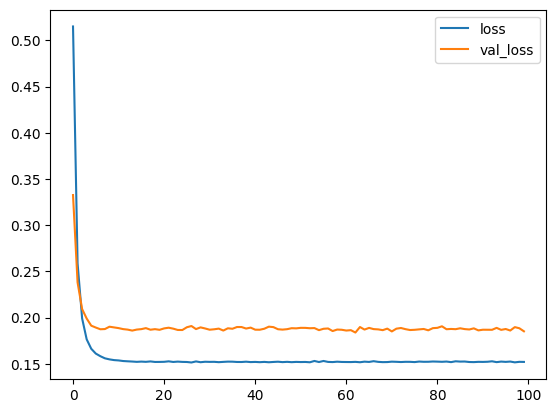

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

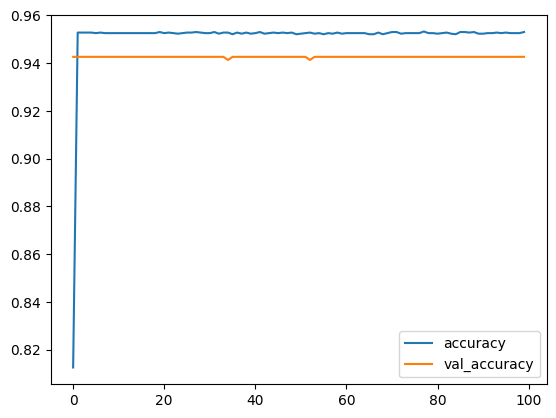

In [21]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

## Evaluating the model

In [22]:
print(f"Training score: {model.evaluate(X_train, y_train)}")

136/136 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9526
Training score: [0.15057530999183655, 0.9525673389434814]


In [23]:
print(f"Testing score: {model.evaluate(X_test, y_test)}")

24/24 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9426
Testing score: [0.1850966066122055, 0.9426336288452148]
